In [2]:
import pandas as pd
file = "ML_Houses_dataset.csv"
data = pd.read_csv(file)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
livecode_data = data[['GrLivArea', 'SalePrice']]

livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


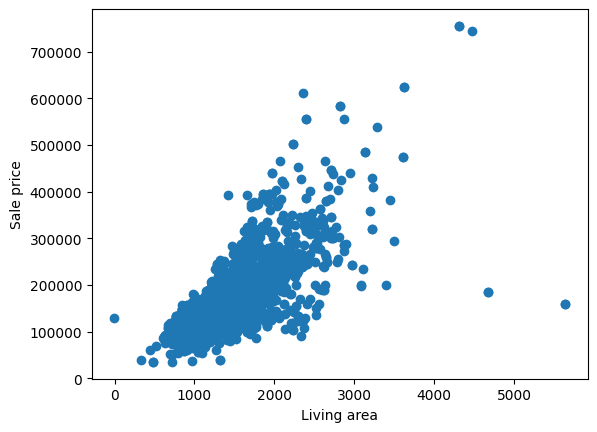

In [5]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

In [6]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instantiate the model (💡 in Sklearn often called "estimator")
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

In [7]:
X

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1755,2073
1756,1125
1757,1640
1758,2229


In [8]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1755    210000
1756    155000
1757    173000
1758    104000
1759    108000
Name: SalePrice, Length: 1760, dtype: int64

In [9]:
model.intercept_

22104.12101002081

In [10]:
model.coef_

array([105.00927564])

In [11]:
model.score(X, y)

0.48960426399689116

In [12]:
new_data = pd.DataFrame({'GrLivArea': [1000]})

model.predict(new_data)

array([127113.39664561])

In [13]:
livecode_data.head()


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [14]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready X's and y's
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [15]:
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test,y_test)

0.5062514700281779

In [16]:
from sklearn.model_selection import cross_validate

# Instantiate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_results['test_score'].mean()

0.4863112208425962

In [20]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#plt.plot(train_sizes, train_scores_mean, label = 'Training score')
#plt.plot(train_sizes, test_scores_mean, label = 'Test score')
#plt.ylabel('r2 score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.legend()

array([0.45858774, 0.46367002, 0.47727139, 0.48470077, 0.4874732 ,
       0.48127082, 0.48513899, 0.48264046, 0.48357416])